In [1]:
%pylab inline
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


In [2]:
xlsx = pd.ExcelFile('project 2-1.xlsx')

In [3]:
narcotic_data = pd.read_excel(xlsx, 'Sheet2', skiprows=[0,1])

# Original shape  (rows and columns)
print(narcotic_data.shape)

(37, 6)


In [4]:
narcotic_data.tail()

,STATE,2012,2013,2014,2015,2016
32,SOKOTO,788.34,1146.00,1469.70,1824.19,191.70
33,TARABA,474.23,941.70,397.66,1069.43,1710.30
34,YOBE,275.77,172.55,398.68,697.09,847.40
35,ZAMFARA,2177.64,1431.10,522.64,271.50,439.32
36,FCT,10213.92,13667.54,6493.62,10603.79,16867.55


In [5]:
narcortic_d = narcotic_data.set_index("STATE")

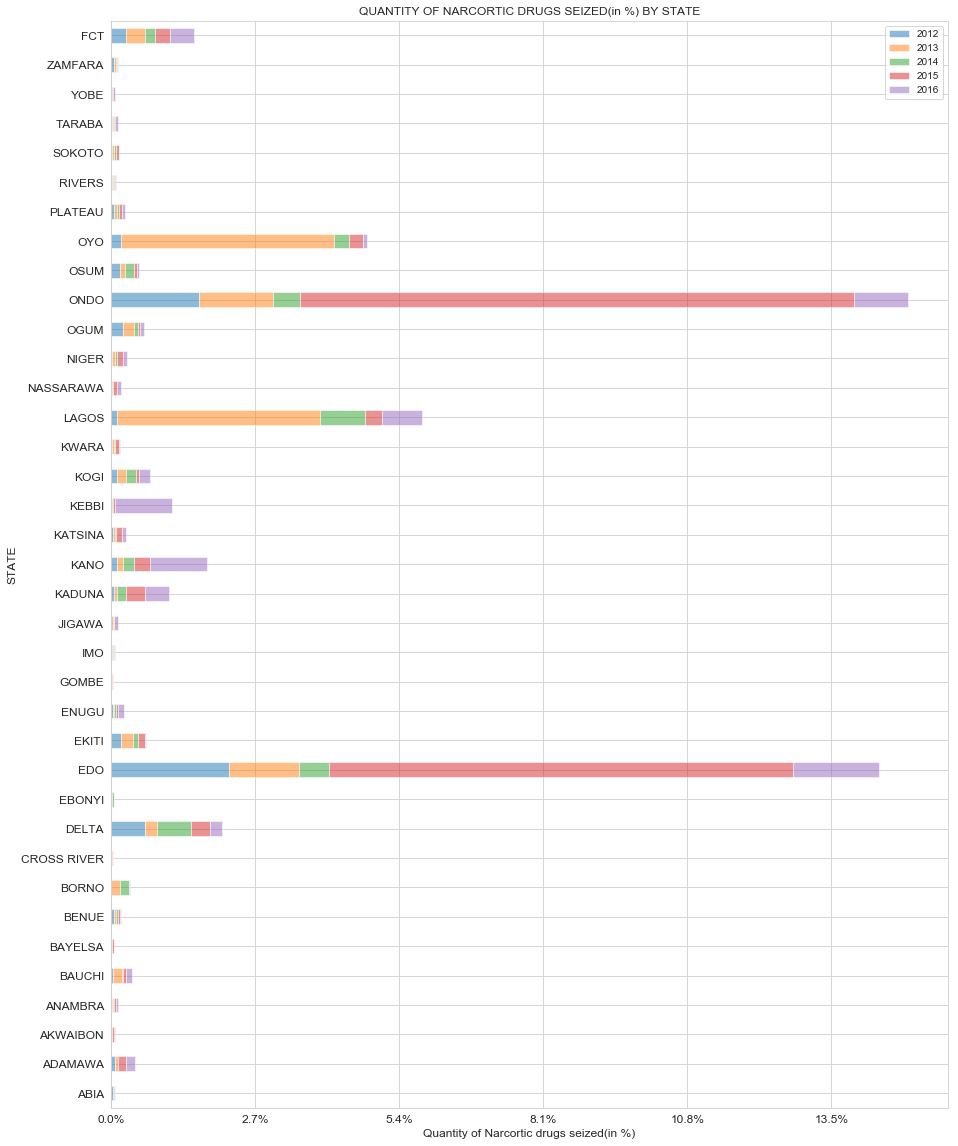

In [27]:
sns.set_style('whitegrid')

axi = narcortic_d.plot(kind='barh', title ="QUANTITY OF NARCORTIC DRUGS SEIZED(in %) BY STATE", stacked=True, alpha=0.5, figsize=(15, 20), legend=True, fontsize=12)
total = float(len(narcotic_data))
axi.set_xlabel("Quantity of Narcortic drugs seized(in %)", fontsize=12)
axi.set_ylabel("STATE", fontsize=12)
axi.set_xticklabels(map('{:.1f}%'.format, 0.001*axi.xaxis.get_majorticklocs()/total))
plt.show()

In [7]:
mylist = list()
for state, twenty12, twenty13, twenty14, twenty15, twenty16 in np.array(narcotic_data):
    mylist.append((state, 2012, twenty12))
    mylist.append((state, 2013, twenty13))
    mylist.append((state, 2014, twenty14))
    mylist.append((state, 2015, twenty15))
    mylist.append((state, 2016, twenty16))

mylist[-6:]



[('ZAMFARA', 2016, 439.32),
 ('FCT', 2012, 10213.92),
 ('FCT', 2013, 13667.54),
 ('FCT', 2014, 6493.62),
 ('FCT', 2015, 10603.79),
 ('FCT', 2016, 16867.55)]

In [8]:
narcotic_dataset = pd.DataFrame(mylist, index=list(range(len(mylist))), columns=pd.Index(["State", "Year", "Quantity_seized"], name="Narcortic Drug"))


In [9]:
narcotic_dataset.head()

Narcortic Drug,State,Year,Quantity_seized
0,ABIA,2012,1112.42
1,ABIA,2013,452.24
2,ABIA,2014,408.06
3,ABIA,2015,633.82
4,ABIA,2016,323.44


In [10]:
def geo_zones(series):
    if series.title() in ["Benue", "Kogi", "Kwara", "Nasarawa", "Niger", "Plateau", "Fct"]:
#    if series.lower() == 'Benue' or series.lower() == 'no':
        return "North Central"
    elif series.title() in ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"]:
        return "North East"
    elif series.title() in ["Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi","Sokoto", "Zamfara"]:
        return "North West"
    elif series.title() in ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"]:
        return "South East"
    elif series.title() in ["Akwa Ibom", "Cross River", "Bayelsa", "Rivers", "Delta", "Edo"]:
        return "South South"
    elif series.title() in ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oyo"]:
        return "South West"


In [11]:
narcotic_dataset['Geo_zones'] = narcotic_dataset['State'].apply(geo_zones)

In [12]:
#narcotic_dataset['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [13]:
# Gettin summary statistics
rp.summary_cont(narcotic_dataset["Quantity_seized"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Quantity_seized,185.0,10849.862216,40526.764051,2979.586952,4971.31432,16728.410113


In [14]:
rp.summary_cont(narcotic_dataset["Quantity_seized"].groupby(narcotic_dataset["Geo_zones"]))

,N,Mean,SD,SE,95% Conf.,Interval
Geo_zones,,,,,,
North Central,30,3960.018333,4145.975832,756.948162,2451.037100,5468.999566
North East,30,1751.868333,2094.516985,382.404733,989.541935,2514.194731
North West,35,4990.217429,9457.863201,1598.670665,1811.077520,8169.357337
South East,25,850.838400,803.779364,160.755873,529.259680,1172.417120
South South,25,24693.880800,65524.687128,13104.937426,-1521.453873,50909.215473
South West,20,48542.020000,89786.526574,20076.877688,8169.073904,88914.966096


In [15]:
stats.f_oneway(narcotic_dataset["Quantity_seized"][narcotic_dataset["Geo_zones"] == 'North Central'], 
             narcotic_dataset["Quantity_seized"][narcotic_dataset["Geo_zones"] == 'North East'],
             narcotic_dataset["Quantity_seized"][narcotic_dataset["Geo_zones"] == 'North West'],
             narcotic_dataset["Quantity_seized"][narcotic_dataset["Geo_zones"] == 'South East'],
             narcotic_dataset["Quantity_seized"][narcotic_dataset["Geo_zones"] == 'South South'],
             narcotic_dataset["Quantity_seized"][narcotic_dataset["Geo_zones"] == 'South West'])


F_onewayResult(statistic=4.973590317591565, pvalue=0.0002932548409807495)

In [16]:
results = ols('Quantity_seized ~ C(Geo_zones)', data=narcotic_dataset).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Quantity_seized   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     4.974
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           0.000293
Time:                        11:51:47   Log-Likelihood:                -1981.3
No. Observations:                 165   AIC:                             3975.
Df Residuals:                     159   BIC:                             3993.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3960.0183   7381.446      0.536      0.592   -1.06e+04    1.85e+04
C(Geo_zones)[T.North East]  -2208.1500   1.04e+04     -0.212      0.833   -2.28e+04    1.84e+04
C(Geo_zones)[T.North West]   1030.1991   1.01e+04      0.102      0.919   -1.88e+04    2.09e+04
C(Geo_zones)[T.South East]  -3109.1799   1.09e+04     -0.284      0.777   -2.47e+04    1.85e+04
C(Geo_zones)[T.South South]  2.073e+04   1.09e+04      1.894      0.060    -889.291    4.24e+04
C(Geo_zones)[T.South West]   4.458e+04   1.17e+04      3.820      0.000    2.15e+04    6.76e+04
==============================================================================
Omnibus:                      241.778   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16901.702
Skew:                           6.337   Prob(JB):                         0.00
Kurtosis:                      50.935   Cond. No.                         6.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Geo_zones),4.064846e+10,5.0,4.97359,0.000293
Residual,2.598970e+11,159.0,NaN,NaN


In [18]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Geo_zones),4.064846e+10,5.0,8.129692e+09,4.97359,0.000293,0.135249,0.107471
Residual,2.598970e+11,159.0,1.634572e+09,NaN,NaN,NaN,NaN


In [19]:
results.diagn

{'jb': 16901.70235358392,
 'jbpv': 0.0,
 'skew': 6.33681011825117,
 'kurtosis': 50.935464776608654,
 'omni': 241.77849473586485,
 'omnipv': 3.1511345441974424e-53,
 'condno': 6.631771881498094,
 'mineigval': 4.28952095401866}